In [25]:
import numpy as np
import imutils
import cv2

import skimage
from skimage import color

import matplotlib.pyplot as plt

path = "../data/crop_improve"

# not the same
#    lab= cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
#    Lv, av, bv = cv2.split(lab)

def get_lab(img):
    rows , columns, channels= img.shape
    Lv = []
    av = []
    bv = []
    cv = []
    for r in range(rows):   #for each column
        for c in range(columns):   
            px_color = img[r,c]
            red , green , blue = px_color[0] , px_color[1] , px_color[2] 
            L , a , b = skimage.color.rgb2lab((red,green,blue))
            Lv.append(L)
            av.append(a)
            bv.append(b)
            cv.append((red/255.0,green/255.0,blue/255.0))

    return Lv , av , bv , cv
        


def handle_image(filename):
    
    p = path + "/" + filename
    print(filename)
    image = cv2.imread(p)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized = imutils.resize(img, width=100)     
    
    # 3 Bilder nebeneinander
    fig, axs = plt.subplots(nrows=1, ncols=3) 
    axs[0].imshow(resized)

    #Lab
    L,a,b,c = get_lab(resized)
    axs[1].scatter(a, b,c = c)

    
    
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([resized], [i], None, [256], [0, 256])
        axs[2].plot(histr, color=col)
        #axs[2].xlim([0, 256])
    
    plt.show()
    
    
    

    

01_original.png


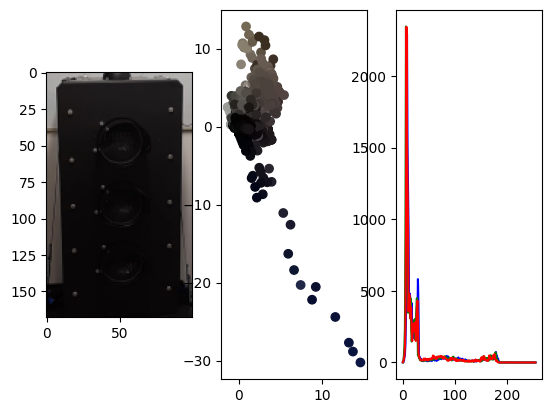

115_original.png


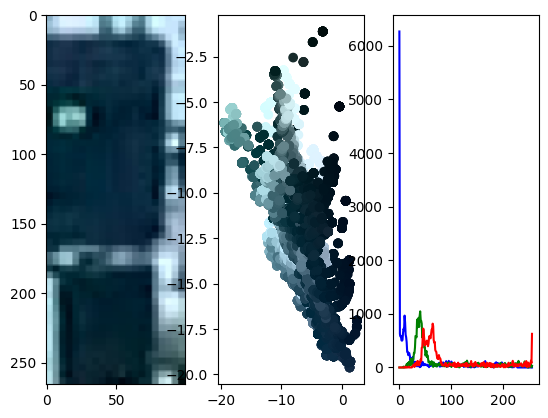

256_original.png


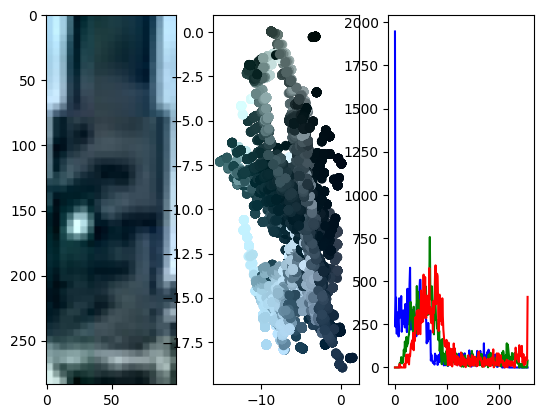

35_original.png


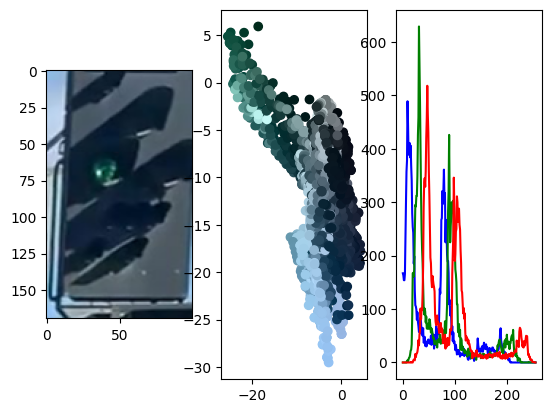

44_original.png


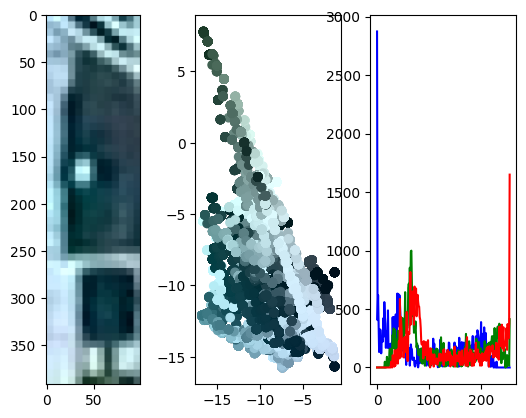

kshauptsignal2_Ks2_vBw.png


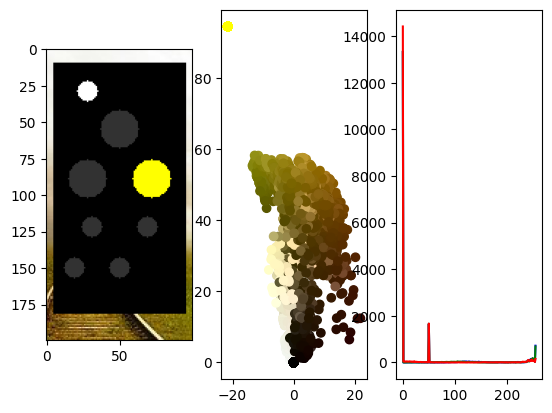

scheibenberg.png


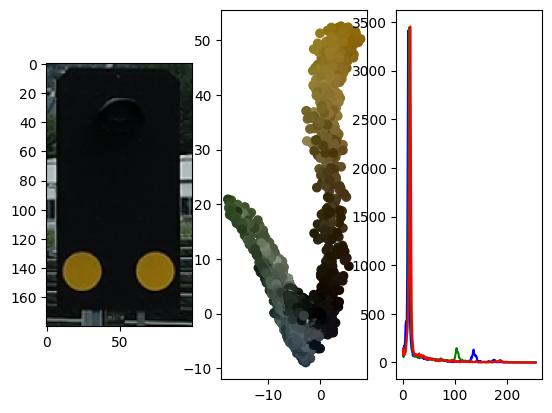

traffic_light0005.png


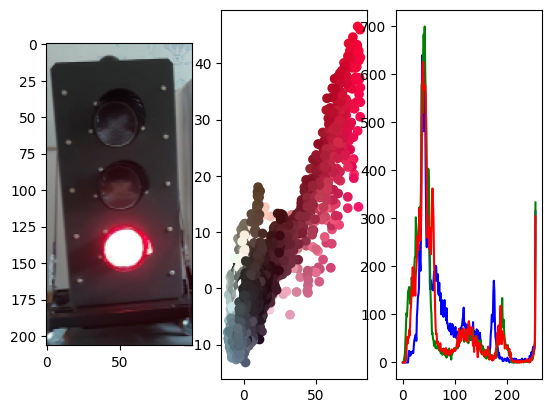

traffic_light0006.png


traffic_light0011.png


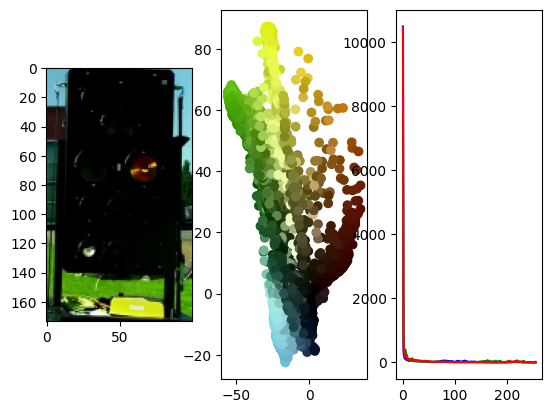

traffic_light0032.png


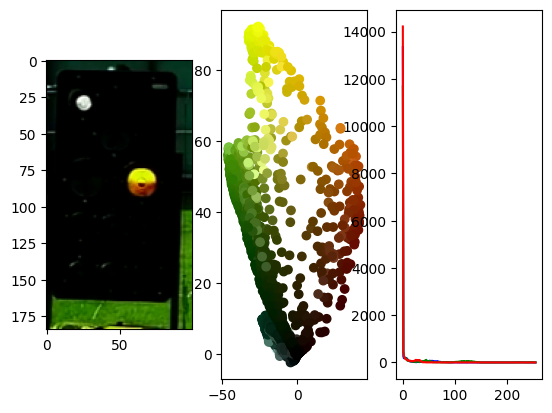

In [26]:
from os import listdir

for filename in listdir(path):
        handle_image(filename)